In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\ANUSHA\\Downloads\\archive (5).zip', encoding= 'latin')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3417,spam,LIFE has never been this much fun and great un...
1450,ham,Msg me when rajini comes.
434,ham,You available now? I'm like right around hills...
610,spam,22 days to kick off! For Euro2004 U will be ke...
3717,ham,Cool. Do you like swimming? I have a pool and ...


In [10]:
df.rename(columns={'v1':'result','v2':'emails'},inplace=True)
df.sample(5)

,result,emails
608,ham,Neva mind it's ok..
1873,spam,You have WON a guaranteed å£1000 cash or a å£2...
2114,spam,Sunshine Hols. To claim ur med holiday send a ...
886,ham,I like to talk pa but am not able to. I dont k...
457,ham,I hope you that's the result of being consiste...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['result'])

In [12]:
df.head()

,result,emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

result    0
emails    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
# EDA 
df['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

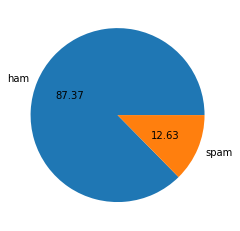

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANUSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['emails'].apply(len)
df['num_words'] = df['emails'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['emails'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,result,emails,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",104,22,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
#ham
df[df['result'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457706,17.120461,1.799601
std,56.357188,13.493532,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#spam
df[df['result'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

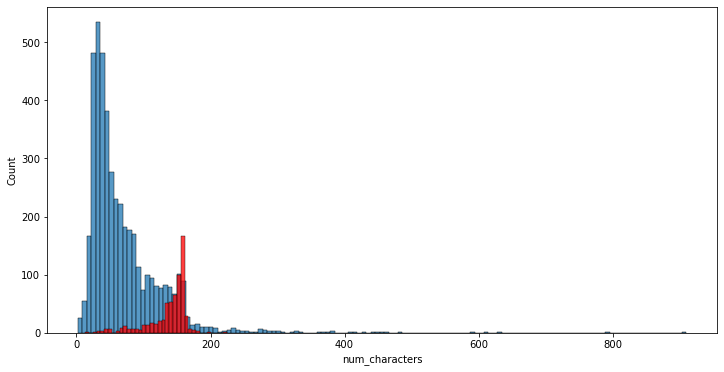

In [25]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['num_characters'])
sns.histplot(df[df['result'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

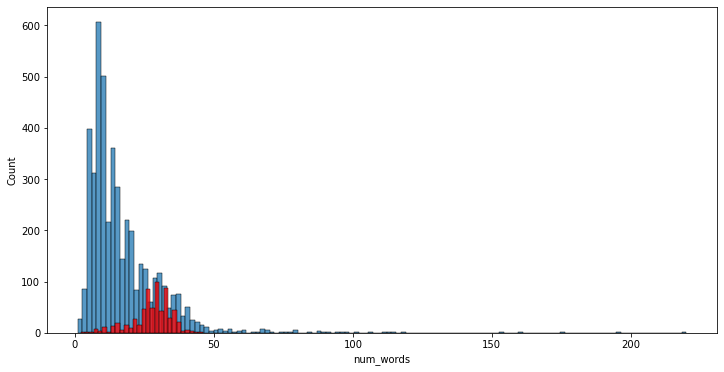

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['num_words'])
sns.histplot(df[df['result'] == 1]['num_words'],color='red')

In [27]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANUSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def transform_text(emails):
    emails = emails.lower()
    emails = nltk.word_tokenize(emails)
    
    y = []
    for i in emails:
        if i.isalnum():
            y.append(i)
    
    emails = y[:]
    y.clear()
    
    for i in emails:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    emails = y[:]
    y.clear()
    for i in emails:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
df['emails'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [32]:
df['transformed_text'] = df['emails'].apply(transform_text)

In [33]:
df.head()

,result,emails,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",104,22,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


1. Accuracy: How often the model’s predictions are correct overall.

2. Confusion Matrix: A table that shows correct and incorrect predictions for each type (e.g., spam and ham).

3. Precision: When the model says "spam," how often it’s actually spam.

4. Recall: Out of all the real spam emails, how many the model correctly found.

5. F1 Score: A single score that balances Precision and Recall to give a sense of overall performance.
    
    Accuracy:  High (Above 90%)
        
    Precision: High (Above 90%)
        
    Recall:    High (Above 90%)
        
    F1 Score:  High (Above 90%)
    
A score of 0.98 in accuracy, precision, recall, or F1 indicates excellent performance, with the model making very few errors in classifying spam and ham emails.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [38]:
X.shape

(5169, 3000)

In [40]:
y = df['result'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Gaussian Naive Bayes

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8907156673114119
Confusion Matrix:
 [[797  92]
 [ 21 124]]
Precision: 0.5740740740740741
Recall: 0.8551724137931035
F1 Score: 0.6869806094182825


"The Accuracy is 90%, but we have achieved 89.07% which is just below the expected threshold of 90%"

Multinomial Naive Bayes

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.97678916827853
Confusion Matrix:
 [[889   0]
 [ 24 121]]
Precision: 1.0
Recall: 0.8344827586206897
F1 Score: 0.9097744360902255


"The Accuracy is 90%, We achieved a high accuracy rate of 97.67% exceeding 90%."

Bernoulli Naive Bayes

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9825918762088974
Confusion Matrix:
 [[887   2]
 [ 16 129]]
Precision: 0.9847328244274809
Recall: 0.8896551724137931
F1 Score: 0.9347826086956521


"The Accuracy is 90%, We achieved a high accuracy rate of 98.25%, exceeding 90%."

Selecting MultinomialNB as final model as it has highest precision and 97.29% accuracy.

In [46]:
def text_check(emails):
    t_string = transform_text(emails)
    num_string = tfidf.transform([t_string])
    result = mnb.predict(num_string)[0]
    if result == 1:
        print("spam")
    else:
        print("Not spam")    

In [47]:
text1 = "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+"
text_check(text1)

spam


In [48]:
text2 = "hi, how are you?"
text_check(text2)

Not spam


In [49]:
import re
from nltk.tokenize import word_tokenize

df['transform_text'] = df['emails'].str.lower()
# Tokenization
df['transform_text'] = df['transform_text'].apply(word_tokenize)

# Removing special characters
df['transform_text'] = df['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
df['transform_text'] = df['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
df['transform_text'] = df['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
df['transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
print(df[['emails', 'transform_text']].head())

                                              emails  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      transform_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4            nah nt think goe usf live around though  


In [50]:
encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['result'])
df.sample(2)
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['emails']).toarray()
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.svm import SVC

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.99
confusion Matrix : [[889   0]
 [ 14 131]]
Precision Score:  1.0


In [60]:
#Predict with new data
new_emails = [
    "Get a free iPhone now!",
    "Hey, how's it going?",
    "Congratulations! You've won a prize!",
    "Reminder: Meeting at 2 PM tomorrow."
]

new_X = tfidf.transform(new_emails)
new_X_dense = new_X.toarray()
svm_predictions = svc_classifier.predict(new_X_dense)
for email, prediction in zip(new_emails, svm_predictions):
    if prediction == 1:
        print(f"'{email}' is predicted as spam.")
    else:
        print(f"'{email}' is predicted as ham.")

'Get a free iPhone now!' is predicted as spam.
'Hey, how's it going?' is predicted as ham.
'Congratulations! You've won a prize!' is predicted as spam.
'Reminder: Meeting at 2 PM tomorrow.' is predicted as ham.


In [55]:
#User Input Data Prediction
def predict_email(email):
    email_vector = tfidf.transform([email])
    email_vector_dense = email_vector.toarray()
    prediction = svc_classifier.predict(email_vector_dense)
    if prediction[0] == 1:
        print("The email is predicted as spam.")
    else:
        print("The email is predicted as ham.")
user_email = input("Enter the email text: ")
predict_email(user_email)

Enter the email text: Get a free iPhone now!
The email is predicted as spam.
